Import libraries and read the csv

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
#df = pd.read_csv("faults_registers.csv")
df = pd.read_csv("faults_memory_pass.csv")
display(df)

FileNotFoundError: [Errno 2] No such file or directory: 'faults_memory.csv'

In [ ]:
cfgv_functions = pd.read_csv('../compiled_cfgv_functions.csv')
eddi_functions = pd.read_csv('../compiled_eddi_functions.csv')
cfgv_functions.equals(eddi_functions) # we are compiling the exact same functions with both mechanisms

False

In [ ]:
df.max

The set of compiled functions does not coincide between the two passes as in CFGVerification we use the duplicated instructions

In [ ]:
compiled_functions = cfgv_functions

In [ ]:
sz_tot = df.shape[0]
df_errcodes = df.groupby('code')
sz_df_errcodes = df_errcodes.size()

In [ ]:
sz_df_errcodes

code
-3       25
-2       12
-1       96
 0    14751
 1       21
 2       23
dtype: int64

In [ ]:
num_crash = sz_df_errcodes[-1]           # crash     = -1
num_silent = sz_df_errcodes[-2]          # sdc       = -2
num_freeze = sz_df_errcodes[-3]          # froze     = -3 (stuck into an infinite loop)
num_detect_eddi = sz_df_errcodes[1]      # eddi detect    =  1
num_detect_cfgv = sz_df_errcodes[2]      # cfgi detect    = 2

tot_faults = num_crash + num_silent + num_freeze + num_detect_cfgv + num_detect_eddi

In [ ]:
tot_faults, sz_tot

(177, 14928)

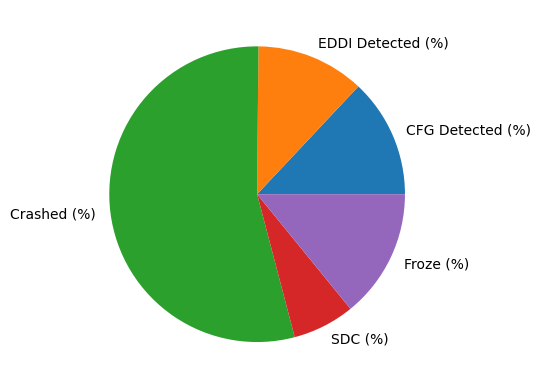

In [ ]:
labels = 'CFG Detected (%)', 'EDDI Detected (%)', 'Crashed (%)','SDC (%)', 'Froze (%)'
plt.pie([num_detect_cfgv/tot_faults, num_detect_eddi/tot_faults, num_crash/tot_faults, num_silent/tot_faults, num_freeze/tot_faults], labels = labels)
plt.show()

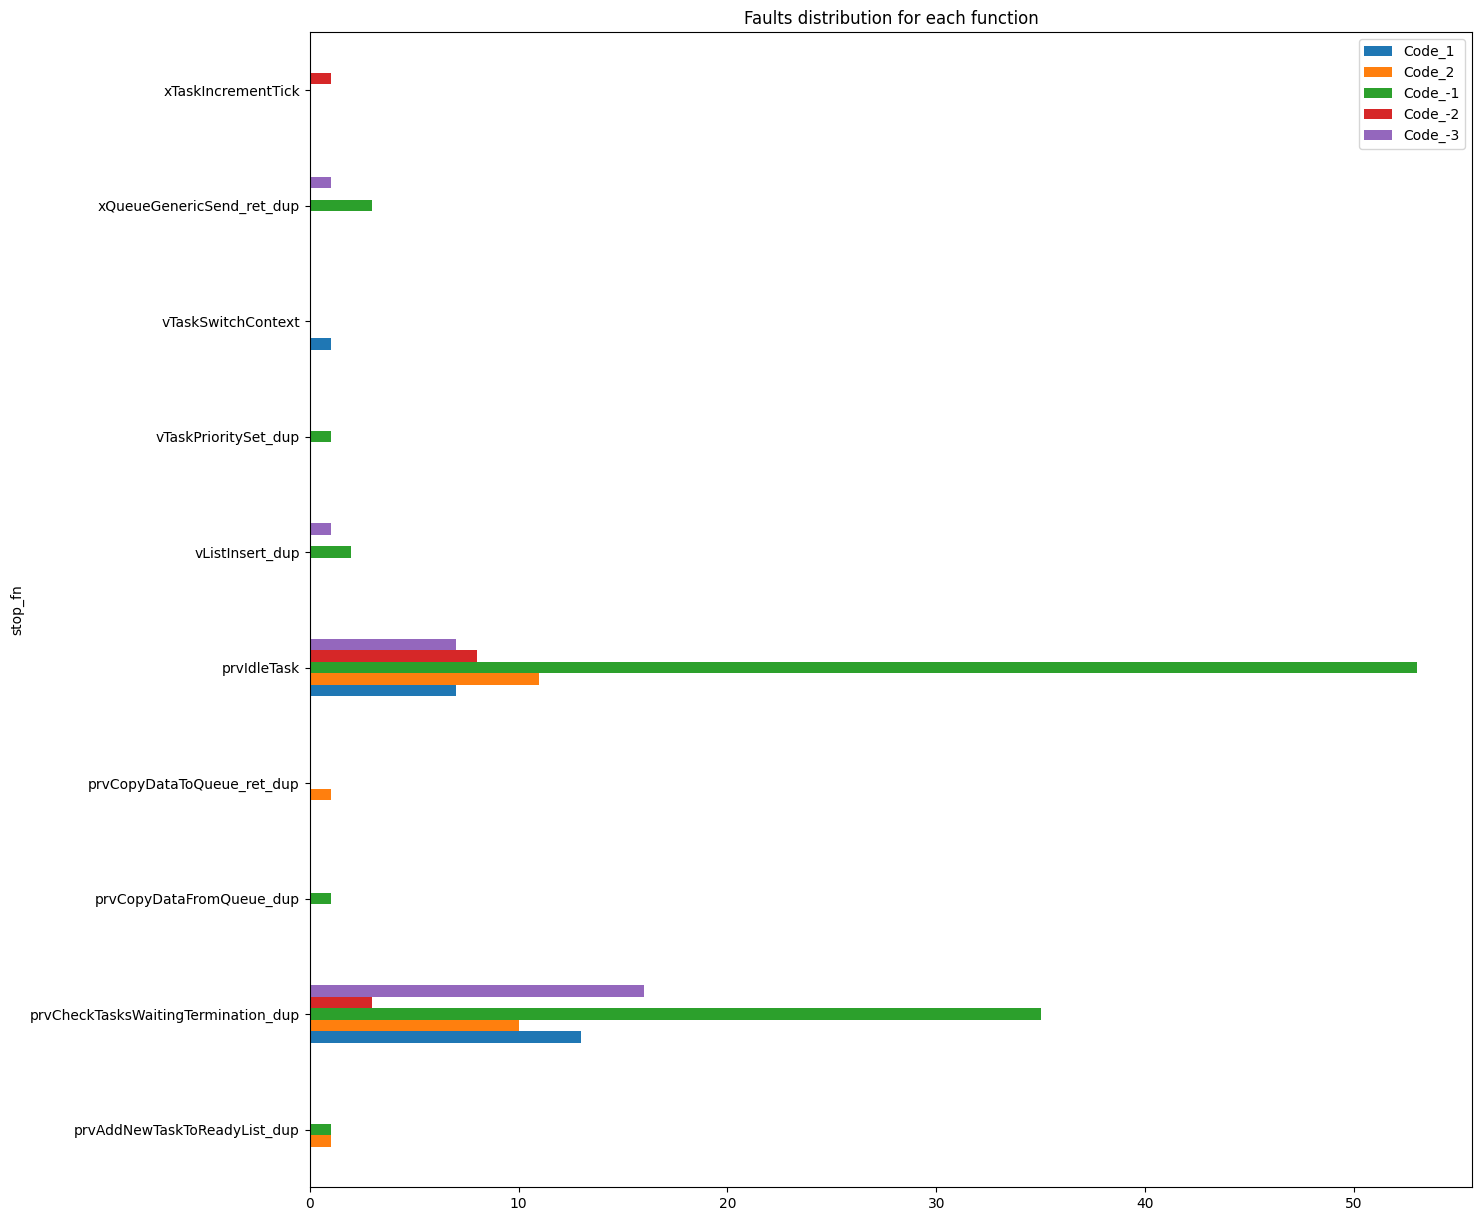

In [ ]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_2', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,15),
                                  title = 'Faults distribution for each function',)

In [ ]:
df['fn_name'] = df['stop_fn']
df = pd.merge(df, compiled_functions, on='fn_name')

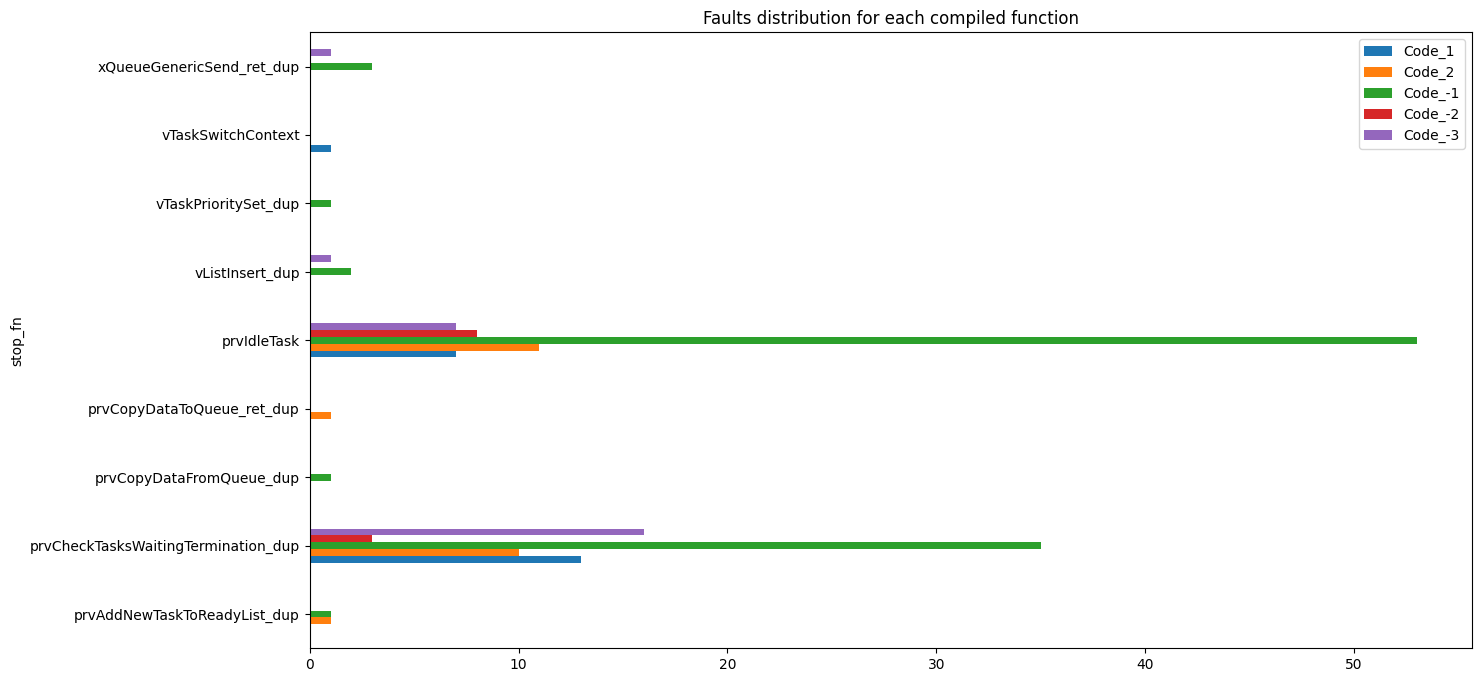

In [ ]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_2', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each compiled function',)

In [ ]:
set_faulty_funcs = set(df1.index)
set_compil_funcs = set(compiled_functions['fn_name'])

In [ ]:
print("Number of functions compiled and faulty:", len(set_compil_funcs.intersection(set_faulty_funcs)))
print("Number of functions not compiled but faulty:", len(set_faulty_funcs.difference(set_compil_funcs)))

Number of functions compiled and faulty: 67
Number of functions not compiled but faulty: 0
